# Estructura de la red
La red de bicicletas puede ser considerada como una estructura de procesamiento de informacion donde los nodos son las unidades de procesamiento y el camino que los vincula, la conexión.

Estructura de la red:
    
    1) NODOS: Estaciones
    2) CONEXION (edge): Camino | Recorrido | Calles
    3) PESOS (intensidad de la conexion): cantidad de usuarios? | tiempo de uso? | distancia en km?
    4) DIRECCIONALIDAD: Dirigido o No dirigido?  Podria pensarse como dirigido o dirigido reciproco con self-loops
    5) TAMAÑO
    

### Metricas de la red y preguntas relevantes

1) Por cuantos nodos esta compuesta la red y cuantos edges los vinculan?

2) Como es la direccionalidad de la red: 
    2.1_Las bicicletas suelen dejarse en la misma estacion de la que se retiran?(self-loop)
    2.2_Cuales son las estaciones que mas conexiones tienen entre si?

3) Degree centrality distribution de los nodos:
    3.1_Cual es la estacion con mayor cantidad de conexiones?
    
4) Betweenness centrality distribution de los nodos:
    4.1_Hay alguna estacion que permita clusterizar recorridos?
    
5) Cual es el grado promedio de la red? El promedio de relaciones que existe entre los nodos de la red (<k> = L/N)
    
6) Cual es el flujo maximo de pasajeros que podria soportar la red de bicicletas?

7) Cual es el camino mas corto entre n y k estaciones?

8) Diametro de la red. Cual es la distancia promedio que se recorre en la red de bicicletas de caba?

In [ ]:
# Librerias que vamos a usar
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# 1: Hay x nodos conectados por n edges
len(B.nodes())
len(B.edges())

In [ ]:
# Plot the degree distribution de la red de bicicletas
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

In [ ]:
# Plot the betweennes centrality distribution de la red de bicicletas
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()

In [ ]:
# Representar los ejes con un matrixplot

In [ ]:
# Cual es la estacion con mayor degree centrality?

In [ ]:
# Se pueden recomendar conexiones entre estaciones?

# ESTRUCTURANDO LA RED DE BICICLETAS

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Cargamos datasets de recorridos
df15 = pd.read_csv('data/bici15_cdn.csv')
df16 = pd.read_csv('data/bici16_cdn.csv')
df17 = pd.read_csv('data/bici17_cdn.csv')
df18 = pd.read_csv('data/bici18_cdn.csv')
df19 = pd.read_csv('data/bici19_cdn.csv')

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
# Instanciamos un grafo direccionado
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

In [56]:
# Esto me parece que seria pensando a las personas como nodo
# Funcion para crear edges en una red de transporte

def vinculos_e_nodos(df, columna1, columna2):
    '''
    Devuelve los extremos conectados por un vinculo (edge)
    '''
    
    origen = df[columna1]
    destino = df[columna2]
    
    vinculados = zip(origen,destino)
    
    return list(vinculados)

In [64]:
edges = vinculos_e_nodos(df18, 'bici_estacion_origen', 'bici_estacion_destino')

In [80]:
# Creamos una lista de edges (estacion_n, estacion_k)
D.add_edges_from(edges)

In [81]:
len(D.edges())

56940

In [82]:
len(D.nodes())

18658

In [86]:
# A partir de aca seria pensando las estaciones como nodo
df_graf = df18.groupby(['bici_nombre_estacion_origen','bici_nombre_estacion_destino']).size().reset_index(name='recorridos')

In [89]:
df_graf.columns = ['origen','destino','recorridos']

In [92]:
grafo = nx.from_pandas_edgelist(df_graf,'origen','destino','recorridos')

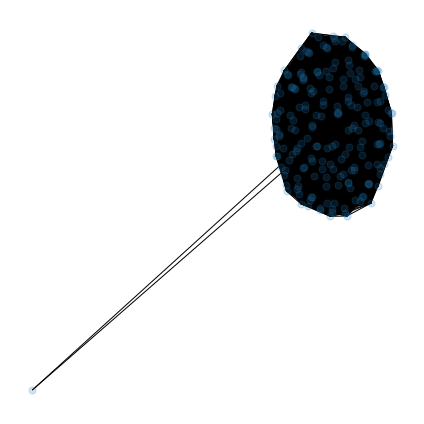

In [207]:
plt.figure(figsize=(6,6))
pos = nx.spring_layout(grafo)
nx.draw_networkx_nodes(grafo, pos, alpha=0.2, node_size=50)
nx.draw_networkx_edges(grafo, pos, style='solid', aplha=0.1)
plt.axis('off')
plt.tight_layout()
plt.show()

In [108]:
import geopandas as gpd
import mplleaflet

In [151]:
# Shape de estaciones descargados de DataBA
estaciones = gpd.read_file('data/estaciones_de_bicicletas.shp')

In [152]:
estaciones = estaciones.to_crs(epsg='4326')

In [153]:
estaciones = nodos[['NOMBRE','DIRE_NORM', 'geometry']]

In [154]:
nodos = estaciones[['NOMBRE','DIRE_NORM']]

In [157]:
nodos['x'], nodos['y'] = estaciones.geometry.x, estaciones.geometry.y

In [159]:
df_graf2 = pd.merge(df_graf,nodos,left_on='origen',right_on='NOMBRE' )

In [160]:
df_graf3 = pd.merge(df_graf2,nodos,left_on='destino',right_on='NOMBRE' )

In [161]:
df_graf3.columns

Index(['origen', 'destino', 'recorridos', 'NOMBRE_x', 'DIRE_NORM_x', 'x_x',
       'y_x', 'NOMBRE_y', 'DIRE_NORM_y', 'x_y', 'y_y'],
      dtype='object')

In [162]:
df_graf3.columns = ['origen', 'destino', 'recorridos', 'nom_or', 'dirnom_or', 'lon_or',
       'lat_or', 'nom_de', 'dirnom_de', 'lon_de', 'lat_de']

In [164]:
df_graf4 = df_graf3[['origen', 'dirnom_or', 'lon_or', 'lat_or', 'destino', 'dirnom_de', 'lon_de', 'lat_de', 'recorridos']]

In [ ]:
# Creamos una lista de adyacencias> un diccionario por nodo (key) y una lista de nodos con los que conecta como value